# Sklasyfikowanie wiadomości jako spam lub nie-spam

### Cel

* Dostrojenie parametrów klasyfikatora
* Minimalizacja stopy błędów (FNR)
* Przy zapewnieniu stopy błędów (FPR) poniżej 0.5%

## Rozmiar danych

In [1]:
import pandas as pd

dataframe = pd.read_csv("./data/spam.dat")

X = dataframe.drop(['target'], axis = 1)
y = dataframe.target

print(X.shape)
print(y.shape)

(4789, 462)
(4789,)


## Klasyfikator - Maszyny wektorów nośnych (SVC)

In [2]:
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def SupportVectorClassification(c):
    clf = SVC(C = c, random_state = 123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)     
    report = classification_report(y_test, y_pred, output_dict=True)
    
    FNR = round((1 - report['yes']['recall']) * 100, 2)
    FPR = round((1 - report['no']['recall']) * 100, 2)
    
    print(
        'C:', c,
        ' | FNR:', FNR, ' %',
        ' | FPR:', FPR, ' % |\n'
    )
    
    plt.show()
    
    return FNR, FPR

## Parametry klasyfikatora

* Parametr C (0.5, 1, 2, 5, 10, 25)

C: 0.5  | FNR: 3.77  %  | FPR: 0.4  % |



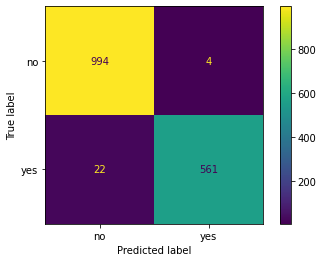

C: 1  | FNR: 4.12  %  | FPR: 0.4  % |



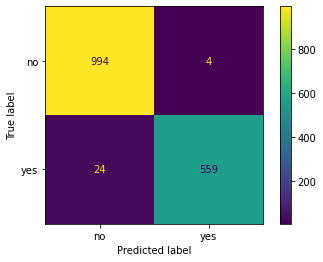

C: 2  | FNR: 4.29  %  | FPR: 0.4  % |



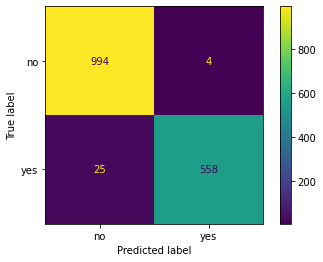

C: 5  | FNR: 3.77  %  | FPR: 0.3  % |



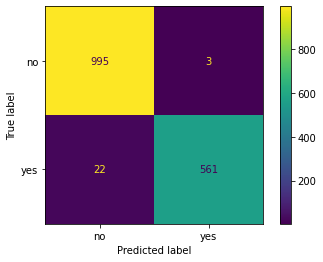

C: 10  | FNR: 3.6  %  | FPR: 0.6  % |



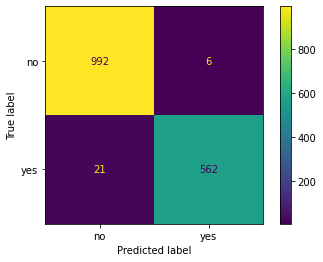

C: 25  | FNR: 3.26  %  | FPR: 0.7  % |



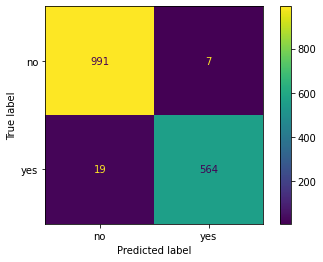

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

fnr_arr = []
fpr_arr = []

c_arr = [0.5, 1, 2, 5, 10, 25]

for c in c_arr:
    fnr, fpr = SupportVectorClassification(c)
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od parametru C

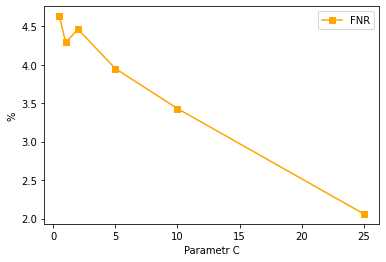

In [12]:
plt.plot(c_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('Parametr C')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od parametru C

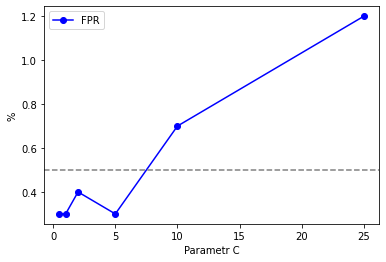

In [13]:
plt.plot(c_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('Parametr C')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

### Wykres porównawczy FNR i FPR w zależności od parametru C

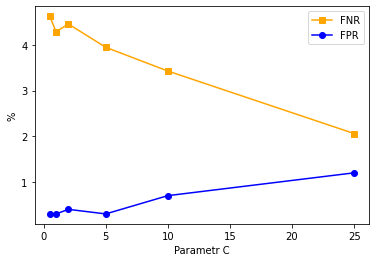

In [14]:
plt.plot(c_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(c_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('Parametr C')
plt.ylabel('%')
plt.legend()
plt.show()

## Redukcja wymiarowości danych (feature selection)

* PCA
* RFE

C: 5  | FNR: 3.95  %  | FPR: 0.7  % |



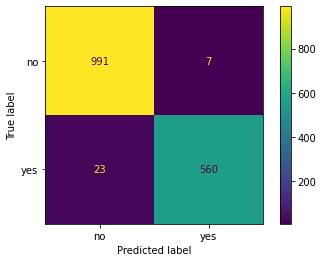

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)

X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=123, test_size=0.33)

fnr, fpr = SupportVectorClassification(c = 5)

C: 5  | FNR: 3.09  %  | FPR: 0.6  % |



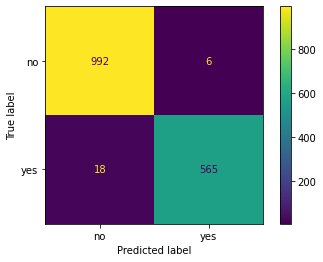

In [8]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=SVC(C = 5, kernel='linear', random_state = 123), n_features_to_select=100)

X_rfe = rfe.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, random_state=123, test_size=0.33)

fnr, fpr = SupportVectorClassification(c = 5)

## Zastosowanie niesymetrycznych kosztów błędów (cost sensitive)

* Pary wagi klas (yes - no / no - yes) (0.125 - 0.875, 0.25 - 0.75, 0.375 - 0.625)

In [9]:
def SupportVectorCostSensitiveClassification(c, yes_arg, no_arg):
    clf = SVC(C = c, class_weight={'yes': yes_arg, 'no': no_arg}, random_state = 123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)     
    report = classification_report(y_test, y_pred, output_dict=True)
    
    FNR = round((1 - report['yes']['recall']) * 100, 2)
    FPR = round((1 - report['no']['recall']) * 100, 2)
    
    print(
        'Yes:', yes_arg,
        ' | No:', no_arg,
        ' | FNR:', FNR, ' %',
        ' | FPR:', FPR, ' % |\n'
    )
    
    plt.show()
    
    return FNR, FPR

Yes: 0.125  | No: 0.875  | FNR: 4.63  %  | FPR: 0.3  % |



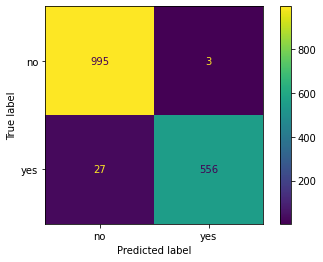

Yes: 0.25  | No: 0.75  | FNR: 4.29  %  | FPR: 0.3  % |



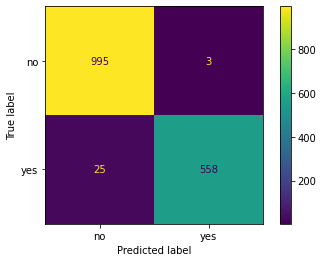

Yes: 0.375  | No: 0.625  | FNR: 4.46  %  | FPR: 0.4  % |



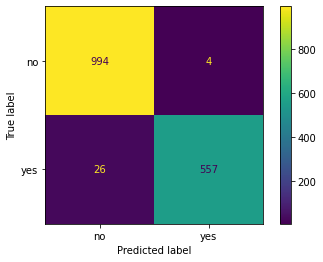

Yes: 0.625  | No: 0.375  | FNR: 3.95  %  | FPR: 0.3  % |



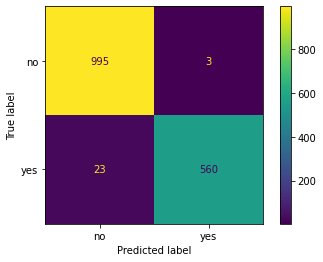

Yes: 0.75  | No: 0.25  | FNR: 3.43  %  | FPR: 0.7  % |



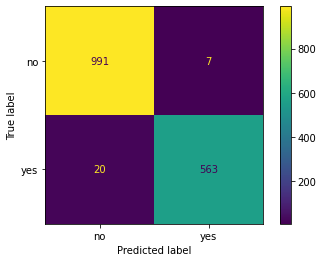

Yes: 0.875  | No: 0.125  | FNR: 2.06  %  | FPR: 1.2  % |



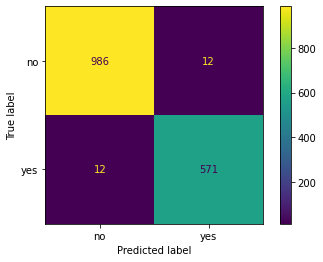

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

fnr_arr = []
fpr_arr = []

cost_arr = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]

for i in range(len(cost_arr)):
    fnr, fpr = SupportVectorCostSensitiveClassification(5, cost_arr[i], cost_arr[len(cost_arr) - i - 1])
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres porównawczy FNR i FPR w zależności od kosztów błędów

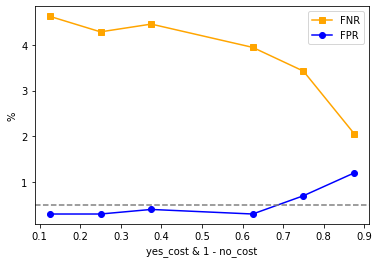

In [11]:
plt.plot(cost_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(cost_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('yes_cost & 1 - no_cost')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()